### Stats Models 패키지의 로지스틱 회귀
- Theta (모수) 값만 출력

In [1]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features = 1, n_redundant = 0, n_informative =1, 
                           n_clusters_per_class =1, random_state = 4)
X = sm.add_constant(X0)

In [3]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)  # disp = 0 은 Print 생략
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        16:06:14   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


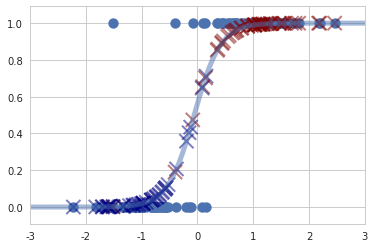

In [7]:
%matplotlib inline
xx = np.linspace(-3, 3, 100)
theta = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, theta, lw=5, alpha = 0.5)
plt.scatter(X0, y, marker = 'o', s=100)
plt.scatter(X0, logit_res.predict(X), marker = 'x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

### Scikit-Learn
- Theta 값을 Binariz 한 후, 0또는 1 결과값을 출력

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


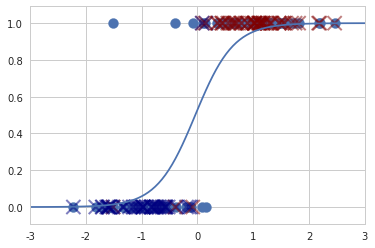

In [15]:
xx = np.linspace(-3, 3, 100)
theta = 1.0/(1 + np.exp(-model.coef_[0][0] * xx - model.intercept_[0]))
plt.plot(xx, theta)
plt.scatter(X0, y, marker = 'o', s= 100)
plt.scatter(X0, model.predict(X0), marker = 'x', c=y, s= 200, lw =2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

### 연습 문제 1
- Y 데이터 중에서setosa, versicolor만 뽑고, 
- X 도 꽃받침 길이 (Sepal Length)만 쓰시면 됩니다. 
- Summary Report ㄴ내고
- Confusion Matrix만들고 Classification Report를 만들고
- ROC커브를 그리고 AUC를 구하십시오/ Statsmodel로 구한 모형 사용

In [345]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  